In [23]:
import numpy as np  # Data Adjustment
import pandas as pd # Dataframe Adjustment 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For showing 
import warnings
from skimage.transform import resize
from keras import models
from keras.layers import Conv2D, Dense,MaxPooling2D, Flatten
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

from tensorflow.keras.callbacks import TensorBoard


In [24]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [25]:
df = ImageDataGenerator( rescale=1./255,
    rotation_range=0,
    shear_range=0.3,
    zoom_range=0.3
    )

# rescale test image to be fit for predict.
df_test = ImageDataGenerator(rescale=1./255)

In [26]:
#train image (rescale to (128,128)).
train_gen = df.flow_from_directory(
    "../Dataset/Train/",
    batch_size =256,
    class_mode = 'binary', 
    target_size = (128, 128))

Found 160000 images belonging to 2 classes.


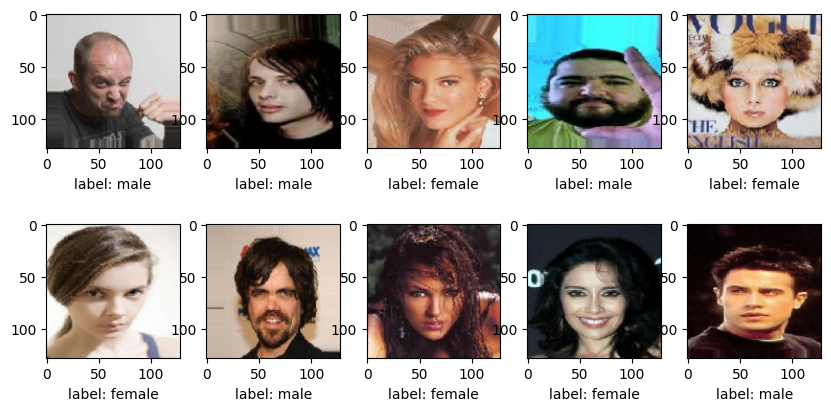

In [27]:
#Plot some images of traning dataset
fig_width = 10
fig_height = 5
fig = plt.figure(figsize=(fig_width, fig_height))

X_batch, y_batch = train_gen.next()
for i in range(10):
  image = X_batch[i]
  if y_batch[i] ==1.0:
    label = 'label: male'
  else:
    label = 'label: female'
  # Display the image
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)

  # Display the label below the image
  ax.set_xlabel(label)

  # Show the plot
plt.show()

In [28]:
# validation image (rescale image size (128,128)).
val_gen = df.flow_from_directory(
    "../Dataset/Validation/",
    batch_size =256,
    class_mode = 'binary', 
    target_size = (128, 128))

Found 22598 images belonging to 2 classes.


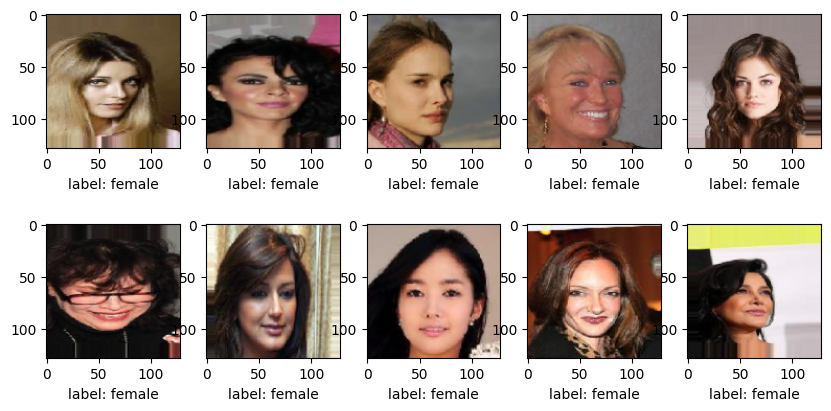

In [29]:
#Plot some images of traning dataset
fig_width = 10
fig_height = 5
fig = plt.figure(figsize=(fig_width, fig_height))

X_batch, y_batch = val_gen.next()
for i in range(10):
  image = X_batch[i]
  if y_batch[i] ==1.0:
    label = 'label: male'
  else:
    label = 'label: female'
  # Display the image
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)

  # Display the label below the image
  ax.set_xlabel(label)

  # Show the plot
plt.show()

In [30]:
#  test image (rescale to image size (128,128)).
test_gen=df_test.flow_from_directory(
    '../Dataset/Test/',
    target_size=(128, 128),
    batch_size=256,
    class_mode='binary')

Found 20001 images belonging to 2 classes.


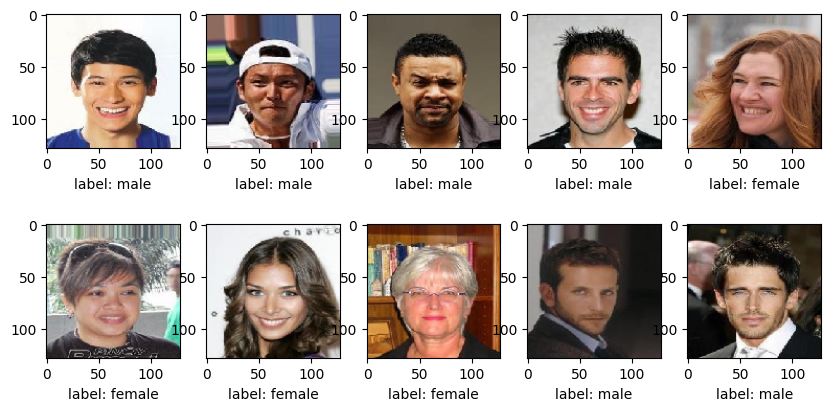

In [31]:
#Plot some images of traning dataset
fig_width = 10
fig_height = 5
fig = plt.figure(figsize=(fig_width, fig_height))

X_batch, y_batch = test_gen.next()
for i in range(10):
  image = X_batch[i]
  if y_batch[i] ==1.0:
    label = 'label: male'
  else:
    label = 'label: female'
  # Display the image
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)

  # Display the label below the image
  ax.set_xlabel(label)

  # Show the plot
plt.show()

In [32]:
kernel_=(3,3) 

In [33]:
model=models.Sequential()

In [34]:
model.add(Conv2D(16, kernel_size=kernel_,
                 input_shape = (128,128, 3),
                 activation = 'relu',padding='valid'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=kernel_, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=kernel_, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=kernel_, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=kernel_, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)      

In [35]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:

#add tensorboard
tensorboard = TensorBoard(log_dir='logs')

In [37]:
#save checkpoint
checkpoint = ModelCheckpoint('model2.hdf5', monitor='val_loss',
save_best_only=True)
callbacks_list = [checkpoint, tensorboard]


In [38]:
# fit model on train data.
training = model.fit(train_gen, epochs=10, 
                steps_per_epoch=70,
                validation_data=val_gen,
                validation_steps=50,
                callbacks=callbacks_list)

Epoch 1/10
70/70 [==============================] - 355s 5s/step - loss: 0.6032 - accuracy: 0.6742 - val_loss: 0.5999 - val_accuracy: 0.7002
Epoch 2/10
70/70 [==============================] - 348s 5s/step - loss: 0.4448 - accuracy: 0.7941 - val_loss: 0.4326 - val_accuracy: 0.7670
Epoch 3/10
70/70 [==============================] - 301s 4s/step - loss: 0.2908 - accuracy: 0.8753 - val_loss: 0.2130 - val_accuracy: 0.9120
Epoch 4/10
70/70 [==============================] - 286s 4s/step - loss: 0.2374 - accuracy: 0.9032 - val_loss: 0.1793 - val_accuracy: 0.9270
Epoch 5/10
70/70 [==============================] - 268s 4s/step - loss: 0.2085 - accuracy: 0.9138 - val_loss: 0.1647 - val_accuracy: 0.9323
Epoch 6/10
70/70 [==============================] - 272s 4s/step - loss: 0.1801 - accuracy: 0.9268 - val_loss: 0.1573 - val_accuracy: 0.9370
Epoch 7/10
70/70 [==============================] - 221s 3s/step - loss: 0.1731 - accuracy: 0.9320 - val_loss: 0.1418 - val_accuracy: 0.9459
Epoch 8/10
70

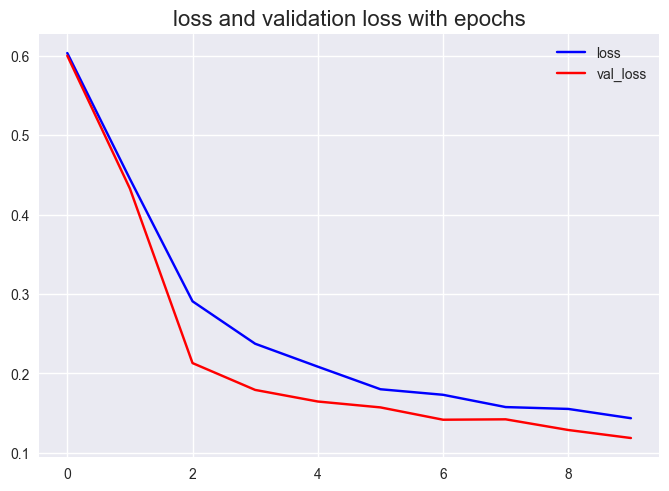

In [39]:
# plot loss function for train and validation.
plt.style.use('seaborn')
plt.title('loss and validation loss with epochs', fontsize=16)
plt.plot(training.history['loss'], color="blue", label="loss")
plt.plot(training.history['val_loss'],color="red", label="val_loss")
plt.legend()
plt.show()

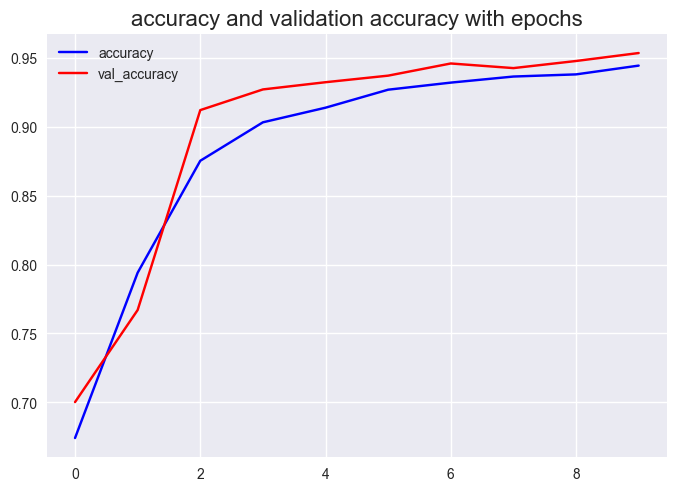

In [40]:
# plot accuracy for train and validation data.
plt.title('accuracy and validation accuracy with epochs', fontsize=16)
plt.plot(training.history['accuracy'], color="blue", label="accuracy")
plt.plot(training.history['val_accuracy'],color="red", label="val_accuracy")
plt.legend()
plt.show()

In [43]:
# callback model
model.load_weights('../nguyen_van_han/model2.hdf5')
model.predict(test_gen)


79/79 [==============================] - 125s 2s/step


array([[9.8019791e-01],
       [8.1060451e-01],
       [9.7813958e-01],
       ...,
       [3.3536708e-05],
       [9.9899322e-01],
       [9.8529631e-01]], dtype=float32)

In [44]:
model.evaluate(test_gen)

79/79 [==============================] - 27s 336ms/step - loss: 0.0963 - accuracy: 0.9631


[0.0963347926735878, 0.963101863861084]

In [45]:
results = model.predict(test_gen)
results.sum()

79/79 [==============================] - 27s 334ms/step


8422.188

In [46]:
# calculate test accuracy and loss.
test_loss, test_acc = model.evaluate_generator(test_gen, steps=50)
print('Test Accuracy:', round(test_acc*100,2),"%")
print('Test Loss:',test_loss)

Test Accuracy: 96.41 %
Test Loss: 0.09374455362558365


In [ ]:
# display  matrix which use to get convlution.
kernel_matrix = model.layers[0].get_weights()[0][:,:,0,0]
plt.imshow(kernel_matrix)
plt.title('Kernel Matrix')
plt.show()

Test the model in bellow section

1/1 [==============================] - 1s 544ms/step


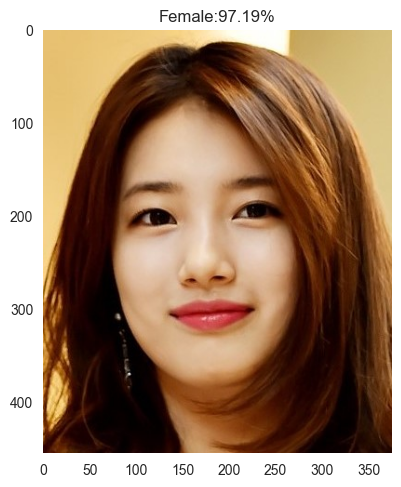

1/1 [==============================] - 0s 39ms/step


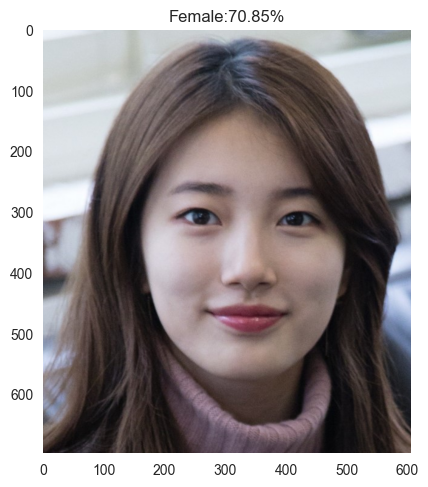

1/1 [==============================] - 0s 35ms/step


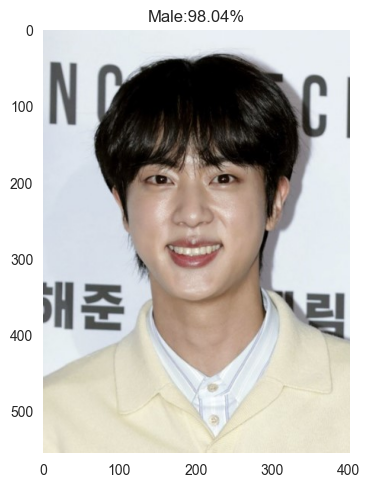

1/1 [==============================] - 0s 38ms/step


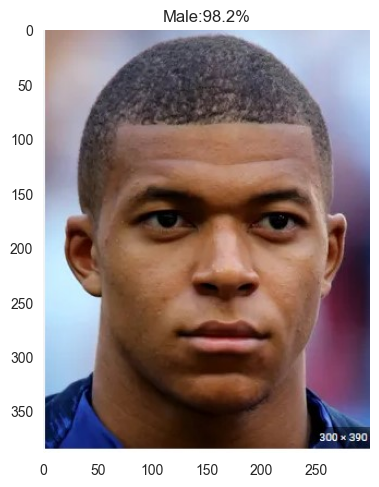

1/1 [==============================] - 0s 38ms/step


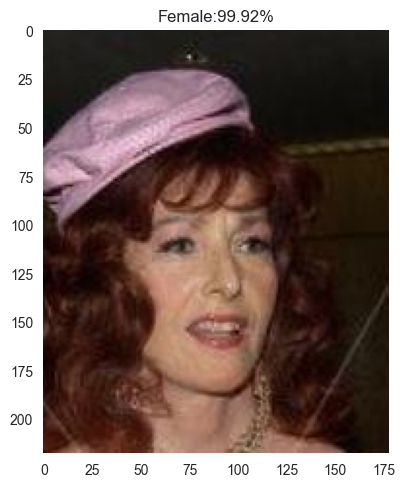

In [48]:

#Load model
# test with any images just put image inside the folder Img
import glob
image_test = '../nguyen_van_han/Img/' # image test path
file_paths1 = glob.glob(image_test + '/*.jpg')[:5] # how many number want to test

for file_path in  file_paths1:
    img1 = plt.imread(file_path)
    img1_resize = resize(img1,(128,128))
    img1_resize = np.expand_dims(img1_resize,axis=0)
    results1 = model.predict(img1_resize)
    plt.grid(b=None)
    plt.imshow(img1)
    if int(results1*2)>=1:
        precentage = (round(float(((results1[0]-0.5 ) +0.5 )* 100 ),2))
        title = f"Male:{precentage}%"
    else:
        precentage = (round(float(((0.5-results1[0])+0.5)* 100 ),2))
        title = f"Female:{precentage}%"
    plt.title(title)
    plt.show()
    